In [3]:
%matplotlib notebook
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from typing import List

### Pregunta 1

¿Cuánto es el máximo que podemos llegar a pagar en un día por los servidores?

In [4]:
NUM_OF_ANALYSTS: int = 14
MAX_JOB_DURATION_LENGHT: float = 33.1

def servers_price(num_nodes: int) -> int:
    normal_price: int = 130
    discounted_price: int = 110
    total_price: List[int] = []
    
    for num in range(1,(num_nodes+1)):
        if num % 3 == 0:
            total_price.append(discounted_price)
        else:
            total_price.append(normal_price)
    
    return sum(total_price)

def hours_to_nodes(hours: float) -> int:
    num_nodes: int = 0
    
    while((num_nodes * 72) < hours):
        num_nodes += 1
    
    return num_nodes

max_jobs: List = [MAX_JOB_DURATION_LENGHT] * NUM_OF_ANALYSTS
    
max_price_per_day = servers_price(hours_to_nodes(sum(max_jobs)))

print("El máximo que podemos llegar a pagar en un día por los servidores son {}€".format(max_price_per_day))

El máximo que podemos llegar a pagar en un día por los servidores son 870€


### Pregunta 2

Pinta un histograma de la distribución de los costes diarios realizando simulaciones de Monte Carlo.

¿Cuál es el coste medio por día que esperamos tener que pagar por los servidores, si siempre pagamos todos los servidores que hacen falta en un día dado?

<IPython.core.display.Javascript object>


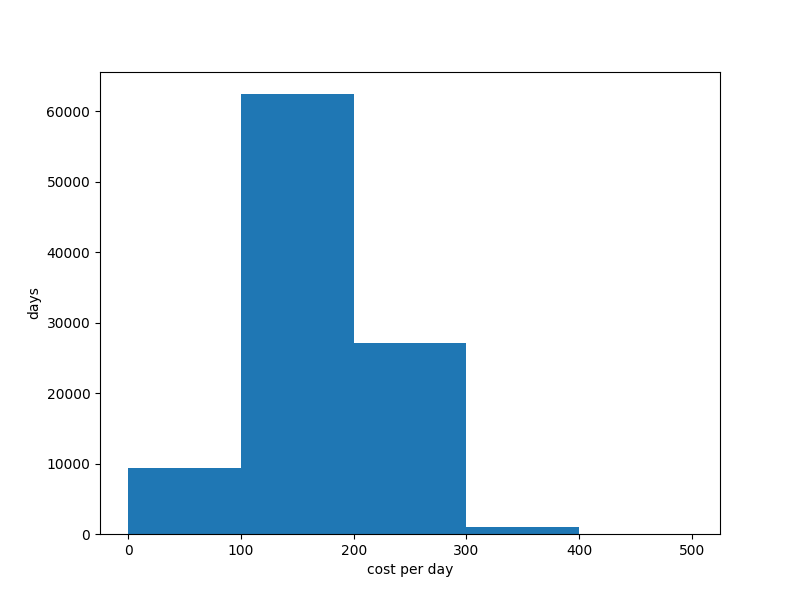

Coste medio por día: 155.8714€ ± 0.9436€


In [18]:
def costs_per_day(num_analysts: int) -> float:
    executed_jobs: List[int] = []
    for analyst in range(num_analysts):
        if np.random.random() <= 0.156:
            executed_jobs.append(1)
        else:
            executed_jobs.append(0)

    cpu_hours: List[float] = []
    for i in range(sum(executed_jobs)):
        cpu_hours.append(15.7 + (33.1 - 15.7) * np.random.random())
        
    return servers_price(hours_to_nodes(sum(cpu_hours)))


def average_costs_per_day(num_trials: int) -> float:
    euros: List[float] = []
        
    for i in range(num_trials):
        euros.append(costs_per_day(num_analysts=14))
    
    return sum(euros)/len(euros)


def simulate_costs(days: int) -> List:
    costs: List[float] = []
    
    for i in range(days):
        costs.append(costs_per_day(num_analysts=14))
        
    return costs

        
costs = simulate_costs(100000)

plt.figure(figsize=(8, 6))
plt.hist(costs, bins = [0,130,260])
plt.xlabel('cost per day')
plt.ylabel('days')

_ = plt.show()

experiment: List[float] = []

for i in range(10):
    estimated_expected_costs = average_costs_per_day(5000)
    experiment.append(estimated_expected_costs)

experiment = np.array(experiment)
experiment_mean = experiment.mean()
experiment_std = experiment.std()

print("Coste medio por día: {0:.4f}€ ± {1:.4f}€".format(experiment_mean, experiment_std))

### Pregunta 3

Supongamos que siempre pagamos todos los servidores que hacen falta en un día dado.

Pinta un histograma de la distribución de los gastos semanales realizando experimentos de Monte Carlo.

¿Cuál es la probabilidad que el gasto en una semana laborable (5 días) supere los 900 euros?

<IPython.core.display.Javascript object>


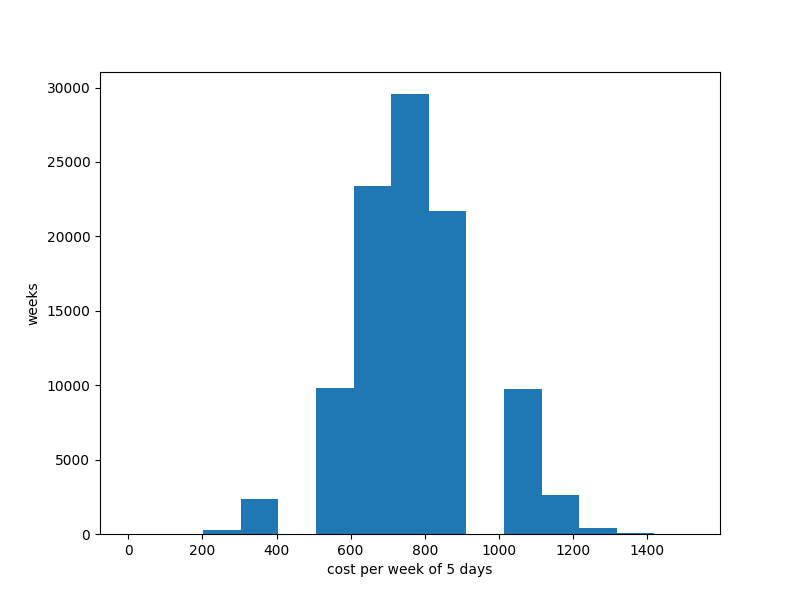

Coste medio por semana: 776.3544€ ± 2.3062€
La probabilidad de que el gasto en una semana laborable (5 días) supere los 900€ es: 0.33031


In [15]:
def average_costs_per_week(num_trials: int, week_days: int = 5) -> float:
    euros: List[float] = []
        
    for i in range(num_trials):
        weekly_costs: List[float] = []
        for i in range(week_days):
            weekly_costs.append(costs_per_day(num_analysts=14))
        
        euros.append(sum(weekly_costs))
    
    return sum(euros)/len(euros)

def simulate_weekly_costs(weeks: int) -> float:
    costs: List[float] = []
    
    for i in range(weeks):
        weekly_costs = sum(simulate_costs(days=5))
        costs.append(weekly_costs)
    
    return costs
    

weekly_costs = simulate_weekly_costs(100000)

plt.figure(figsize=(8, 6))
plt.hist(weekly_costs, bins = 15)
plt.xlabel('cost per week of 5 days')
plt.ylabel('weeks')

_ = plt.show()

experiment: List[float] = []

for i in range(10):
    estimated_expected_costs = average_costs_per_week(5000)
    experiment.append(estimated_expected_costs)

experiment = np.array(experiment)
experiment_mean = experiment.mean()
experiment_std = experiment.std()

print("Coste medio por semana: {0:.4f}€ ± {1:.4f}€".format(experiment_mean, experiment_std))

greather_than_900 = []
for costs in weekly_costs:
    if costs > 900:
        greather_than_900.append(1)
    else:
        greather_than_900.append(0)

print("La probabilidad de que el gasto en una semana laborable (5 días) supere los 900€ es: {0}".format(sum(greather_than_900)/len(weekly_costs)))